# summary

- regulation by $l_p$ norm leads to shrinkage of parameters

- shrinkage: decrease **size (magnitude)** of parameters  参数的大小

- sparsity: decrease **number** of parameters (size of parameters = 0)

- standardization (scaling) is important for Ridge and Lasso (and KNN)

# why regularization?

- avoid overfitting (robust to noise)

- reduce Multicollinearity

    Multicollinearity: > 2 explanatory variables in a multiple regression model are **highly linearly related.**

    We have perfect multicollinearity if the correlation between two independent variables is 1 or −1.

- variable selection: Lasso automatic do variable selection by shrinking coefficients of unimportant variables to be 0 while keep the important variables.

- model interpretation: Lasso will select important variables contributes to response.

# type of regularization

- Ridge regression: $l_2$ norm

- Lasso regression: $l_1$ norm

- Elastic net: combine $l_1$ norm and $l_2$ norm

# def

Regularization/shrinkage decreases size/magnitude of certain weight parameters.

general form of regularization: **a trade-off between loss and regularization** via $\lambda$

$\beta \in \mathbb{R}^p$

$$
\hat \beta \in \arg \min_{\beta} \left\{ {\color{Blue} {L(\beta, \left \{ Z_i \right \}_{i=1}^n)}}  + \lambda\ {\color{Red} {R(\beta)}}  \right\}
$$

- $L(\beta, \left \{ Z_i \right \}_{i=1}^n)$ is loss function, measures fitness of the parameter $\beta$ to data $\left \{ Z_i \right \}_{i=1}^n$

- $\left \{ Z_i \right \}_{i=1}^n$ are any data, e.g. $Z_i=\left\{\begin{matrix}
(x_i,y_i) & \text{supervised learning}\\ 
 (x_i)\ \ & \text{unsupervised learning}
\end{matrix}\right.$

- $\lambda R(\beta)$ is shrinkage penalty

- $R(\beta)$ is $l_q$ norm regularizer, controls **complexity of params**, fits our prior beliefs of the data

$$
R(\beta) = {\sum_{j=1}^p \left | \beta_j \right |^q }
$$

- $\lambda \geq 0$ is regularization parameter, controls amount of shrinkage

    the larger the $\lambda$, the more shinkage of weights

    $\lambda$ is a **hyperparameter**, use cross validation to find optimal $\lambda$


# choices of regularizer: $l_q$ norms

regularizer also called penalty

$l_q$ norms are always **convex function** for $q > 0$

$$
\left \| \beta \right \|_q=\left ( \sum_{j=1}^p \left | \beta_j \right |^q \right )^{\frac{1}{q}}
$$

where $\left | \beta_{(j)} \right |$ is absolute value of the jth coefficient

$l_q$ norm $q$-powered

$$
\left \| \beta \right \|_q^q=\sum_{j=1}^p \left | \beta_j \right |^q 
$$

for $\beta \in \mathbb{R}^p$

$$
\beta=\begin{bmatrix}
\beta_1\\ 
\beta_2\\ 
\vdots \\ 
\beta_j\\ 
\vdots \\
\beta_p\\ 
\end{bmatrix}\
$$

- $l_2$ norm: $$\left \| \beta \right \|_2=\sqrt{\sum_{j=1}^p  \beta_j ^2}$$


- $l_2$ norm squared: $$\left \| \beta \right \|_2^2 = \sum_{j=1}^p \beta_j^2$$


- $l_1$ norm: $$\left \| \beta \right \|_1= \sum_{j=1}^p \left | \beta_j \right |$$


- $l_0$ norm: not a convex, count the number of non-zero elements in a vector

$$\left \| \beta \right \|_0= \sum_{j=1}^p \mathbb{1}(\beta_j \neq 0)$$

# choices of loss function

- for regression: squared loss

- for classification: logistic loss

- any generalized linear model

- for linear regression

$$
\hat \beta \in \arg \min_{\beta} \left\{ {\color{Blue} { \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2} } + \lambda\ {\color{Red} {\sum_{j=1}^p \left | \beta_j \right |^q }} \right\}
$$

- for logistic regression $y \in ${0,1}

$$
\hat \beta \in \arg \min_{\beta} \left\{ \frac{1}{n} \sum_{i=1}^n \left[\ln (1+\exp(-x_i^T \beta)) - y_i x_i^T \beta \right] + \frac{\lambda}{2} \sum_{j=1}^p \beta_j^2 \right\}
$$

# choices of $\lambda$

use 10-fold cross-validation to choose optimal $\lambda$

- set up a grid of $\lambda$ e.g., 0~1


- for each fold (kth) $k=1,...,10$

    for regression, compute mean squared error for each $\lambda$
    
    $$
    {MSE}_k(\lambda) = \frac{1}{N}\sum_{n=1}^N (\hat y_n - y_n)^2
    $$

    where $N$ is the number of data in the kth fold
    

- compute mean MSE for each $\lambda$

$$
\overline{MSE}= \frac{1}{10} \sum_{k=1}^{10} {MSE}_k
$$

Bayes use **Prior** to select optimal $\lambda$, **Prior** is similar to cross-validation
    
http://www.cs.columbia.edu/~blei/fogm/2015F/notes/regularized-regression.pdf

# Ridge Regression

$$
\hat \beta \in \underset{\beta}{\arg \min} \frac{1}{2n} \left \| X\beta-y \right \|_2^2+\frac{\lambda}{2}\left \| \beta \right \|_2^2
$$

loss function is squared loss, regularizer is $l_2$ norm

as $\lambda$ ↑, the coefficients $\beta$ shrink towards 0, standard errors of coefficients ↓

can also write the form as:

$$
\hat \beta \in \underset{\beta}{\arg \min}(X\beta - y)^T(X\beta - y) + \lambda \beta ^T \beta
$$

## loss function: least square

for loss function to be least square, i.e. **RSS (residual sum of squares)**,

ridge regression become **penalized residual sum of squares (PRSS)**

ridge regression has a closed form solution

similar to linear regression, compute by set gradient to 0


$$
\hat \beta = (X^TX + \lambda I_p)^{-1} X^Ty
$$

can also write as this form:

$$
\hat \beta = \left( \sum_{i=1}^n x_i x_i^T + \lambda I_p \right)^{-1} \left( \sum_{i=1}^n x_i y_i  \right)
$$

## loss function: general loss

for general loss function, ridge regression does **NOT** have a closed form solution

$$
\hat \beta \in \arg \min_{\beta} {\color{Blue} {L(\beta, \left \{ Z_i \right \}_{i=1}^n)}}  + {\color{Red} {\frac{\lambda}{2}\left \| \beta \right \|_2^2}} 
$$

   but we can use gradient descent to find optimal $\hat \beta$
    
   in neural net this gradient descent called **weight decay**

$$
\begin{align}
\beta_{k} 

&= \beta_{k-1} - \eta \nabla_{\beta_{k-1}}\left(L+\frac{\lambda}{2}\left \| \beta_{k-1} \right \|_2^2 \right)\\[1em]

&=\beta_{k-1} - \eta \nabla_{\beta_{k-1}} (L+\lambda \beta_{k-1})\\[1em]

&=(1-\eta \lambda)\beta_{k-1} - \eta \nabla_{\beta_{k-1}} L\left ( \beta_{k-1},\left \{ Z_i \right \}_{i=1}^n \right )\\[1em]
\end{align}
$$

## choice of $\lambda$

- each $\lambda$ results in a different set of coefficients ${\hat \beta}^{(\lambda)}$


- $\lambda$ controls the amount of shrinkage (bias-variance tradeoff)

    - least squares estimate $\hat \beta^{OLS}$ is the max possible ${\hat \beta}^{(\lambda)}$

    - $\lambda \rightarrow 0$: ${\hat \beta}^{(\lambda)}$ is near least squares estimate $\hat \beta^{OLS}$

        low bias of $\hat \beta$ vs. high variance of $\hat \beta$

    - $\lambda \rightarrow \infty$: ${\hat \beta_j}^{(\lambda)} \rightarrow 0$ for $j=1,...,p$

        high bias vs. low variance


## credit e.g.

in the Credit dataset, we use features (income, limit, rating, student) to predict how much credit a client should get

from the plot $\beta$ vs. $\lambda$, we can see as $\lambda$ ↑, $\beta_{j}$ → 0

where $\beta_{j}$ = income/limit/rating/student

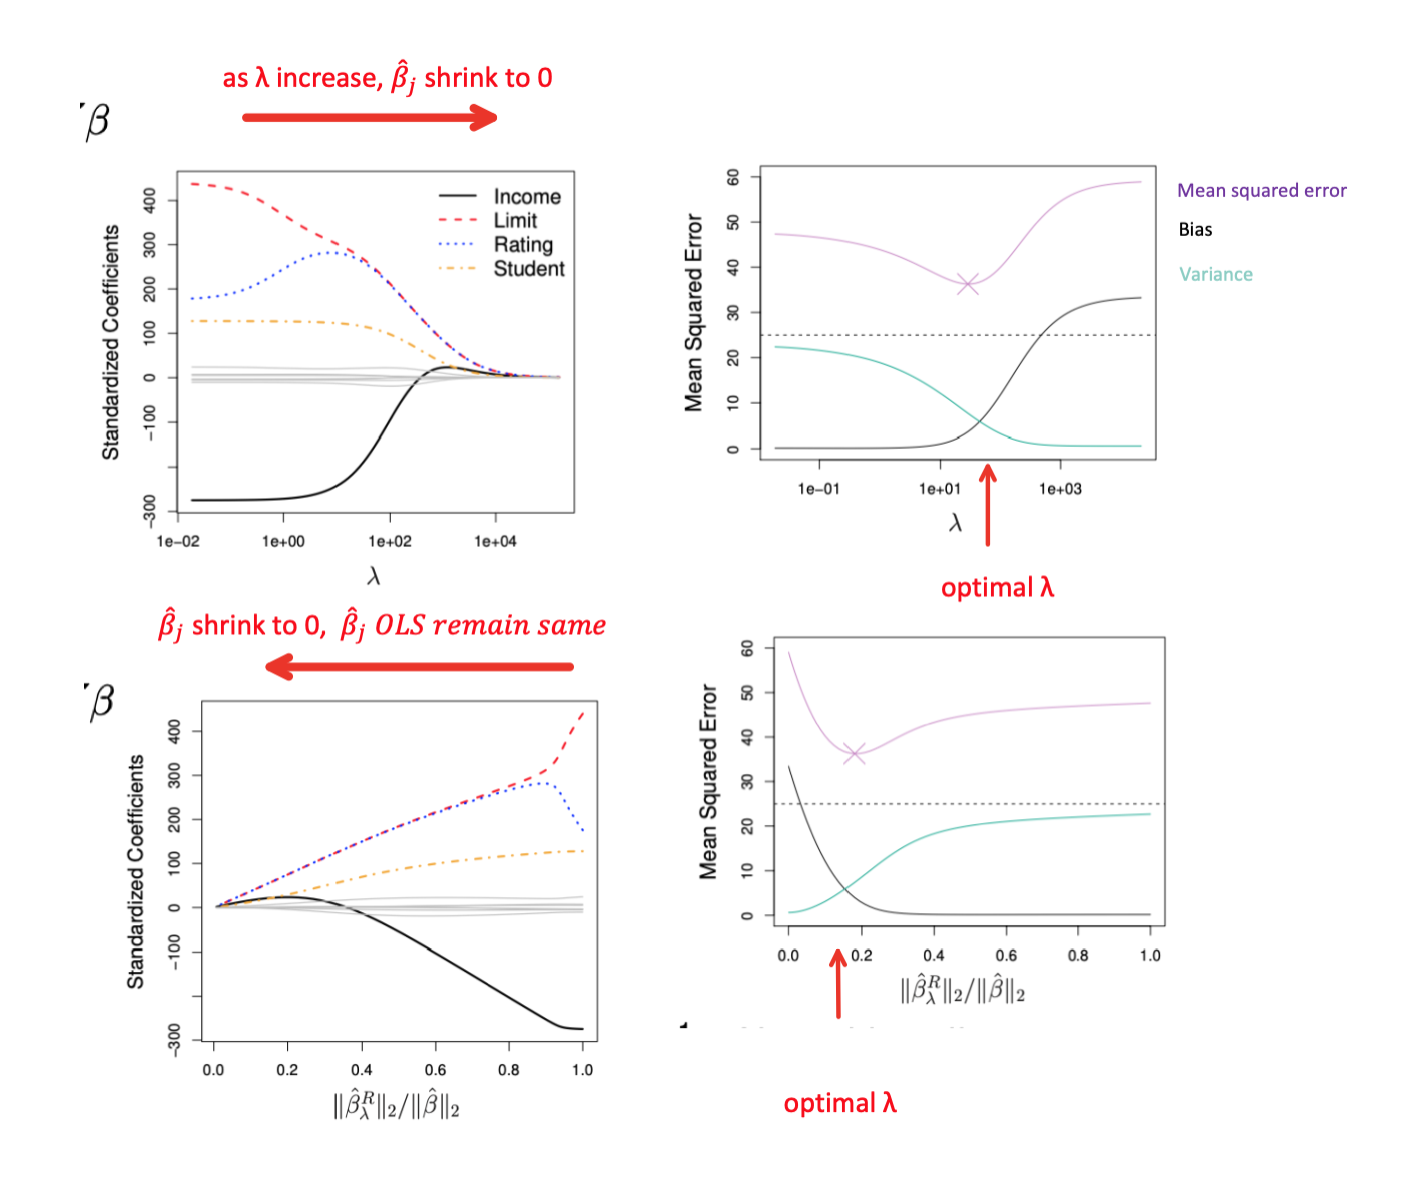

## bias-variance tradeoff: ${\hat \beta}^{ridge}$ vs. ${\hat \beta}^{OLS}$

consider linear model under classical Gauss-Markov assumptions:

$$y=X\beta + \epsilon$$  

where $\epsilon_i \sim N(0, \sigma^2), E(\epsilon_i) =0, Var(\epsilon_i)=\sigma^2$

for loss function to be least squares, the closed form solution of ridge regression is:

$$
{\hat \beta}^{ridge} = (X^TX + \lambda I_p)^{-1} X^Ty
$$

where $\beta \in \mathbb{R}^p$, $I_p$ is a $p \times p$ identity matrix

- **${\hat \beta}^{OLS}$ is an unbiased estimate of $\beta$ while ${\hat \beta}^{ridge}$ is biased**



- **ridge estiamte ${\hat \beta}^{ridge}$ has lower vaiance and higher bias** compared to **ordinary least square** estimate ${\hat \beta}^{ols}$, 

    as $\lambda$ ↑, ${\hat \beta}^{ridge} \rightarrow 0$, $\frac{{\hat \beta}^{ridge}}{{\hat \beta}^{ols}}\rightarrow 0$, bias ↑, variance ↓

$$
{\hat \beta}^{ridge} = (I_p + \lambda (X^TX)^{-1})^{-1} {\hat \beta}^{OLS}
$$

https://www.statlect.com/fundamentals-of-statistics/ridge-regression

- Mean Squared Error of ridge estimate can be decomposed as:

$$
MSE = \text{trace}\left[Var({\hat \beta}^{ridge})\right] + \left[Bias({\hat \beta}^{ridge}) \right]^2 + \sigma^2
$$

- the expected Mean Squared Error can be decomposed as:

$$
\mathbb{E}(MSE) = \text{Var}({\hat \beta}^{ridge}) + \left[Bias({\hat \beta}^{ridge}) \right]^2 + \sigma^2
$$

- bias is higher

    let $R=X^TX$
$$
\begin{align}

{\hat \beta}^{ridge}
&= (X^TX + \lambda I_p)^{-1} X^Ty\\[1em]
&= (R + \lambda I_p)^{-1} R (R^{-1}X^Ty)\\[1em]
&= [R(I_p + \lambda R^{-1})]^{-1} R (R^{-1}X^Ty)\\[1em]
&= (I_p + \lambda R^{-1})^{-1}R^{-1} R {\hat \beta}^{OLS} \\[1em]
&= (I_p + \lambda R^{-1})^{-1} {\hat \beta}^{OLS} \\[1em]

Bias({\hat \beta}^{ridge}) 
&= \beta - \mathbb{E}({\hat \beta}^{ridge})\\[1em] 
&= \beta - \mathbb{E}\left[(I_p + \lambda R^{-1})^{-1} {\hat \beta}^{OLS}\right]\\[1em] 
&= \beta - (I_p + \lambda R^{-1})^{-1}\beta\\[1em] 
&= [I_p - (I_p + \lambda R^{-1})^{-1}]\beta\\[1em] 
&= - \lambda (X^TX)^{-1}\beta \neq 0

\end{align}
$$



- variance is lower

    if $\lambda \rightarrow 0$, $Var({\hat \beta}^{ridge}) \rightarrow 0$

    if $\lambda = 0$, $Var({\hat \beta}^{ridge})=Var({\hat \beta}^{OLS}) = \sigma^2 (X^TX)^{-1}$

$$
\begin{align}
Var({\hat \beta}^{ridge}) 
&= \mathbb{E}\left[ \left( \mathbb{E}\left({\hat \beta}^{ridge}\right) - {\hat \beta}^{ridge} \right)^2 \right] \\[1em]
&= \sigma^2 (X^TX + \lambda I_p)^{-1}X^TX(X^TX + \lambda I_p)^{-1} \\[1em]
&= \sigma^2 (X^TX + \lambda I_p)^{-1} - \sigma^2 \lambda (X^TX + \lambda I_p)^{-2}\\[1em]
&\leq Var ({\hat \beta}^{ols})
\end{align}
$$

stanford

https://statweb.stanford.edu/~owen/courses/305a/Rudyregularization.pdf

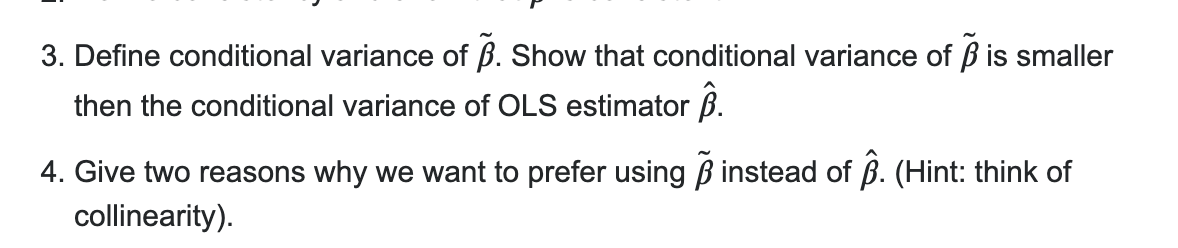

proof: 

https://stats.stackexchange.com/questions/245909/prove-that-the-variance-of-the-ridge-regression-estimator-is-less-than-the-varia

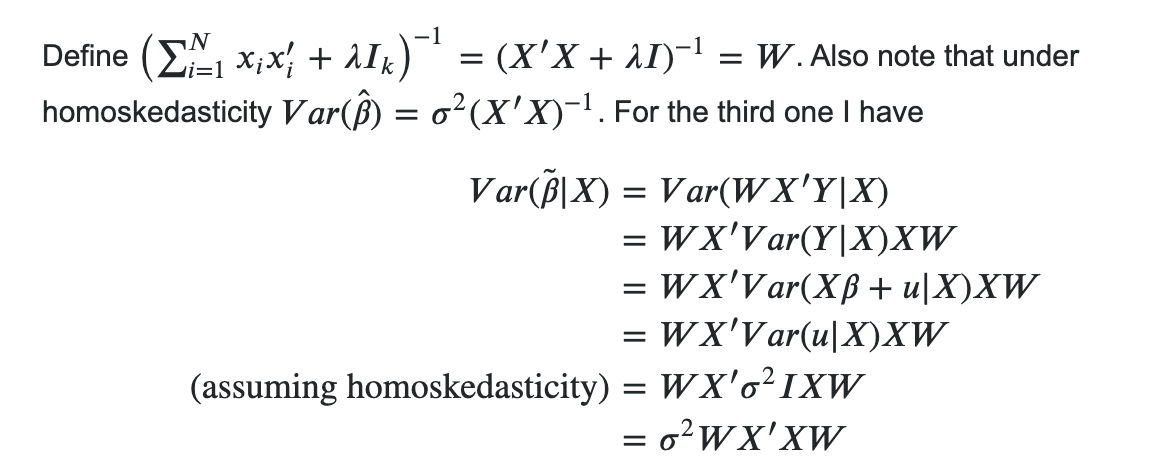

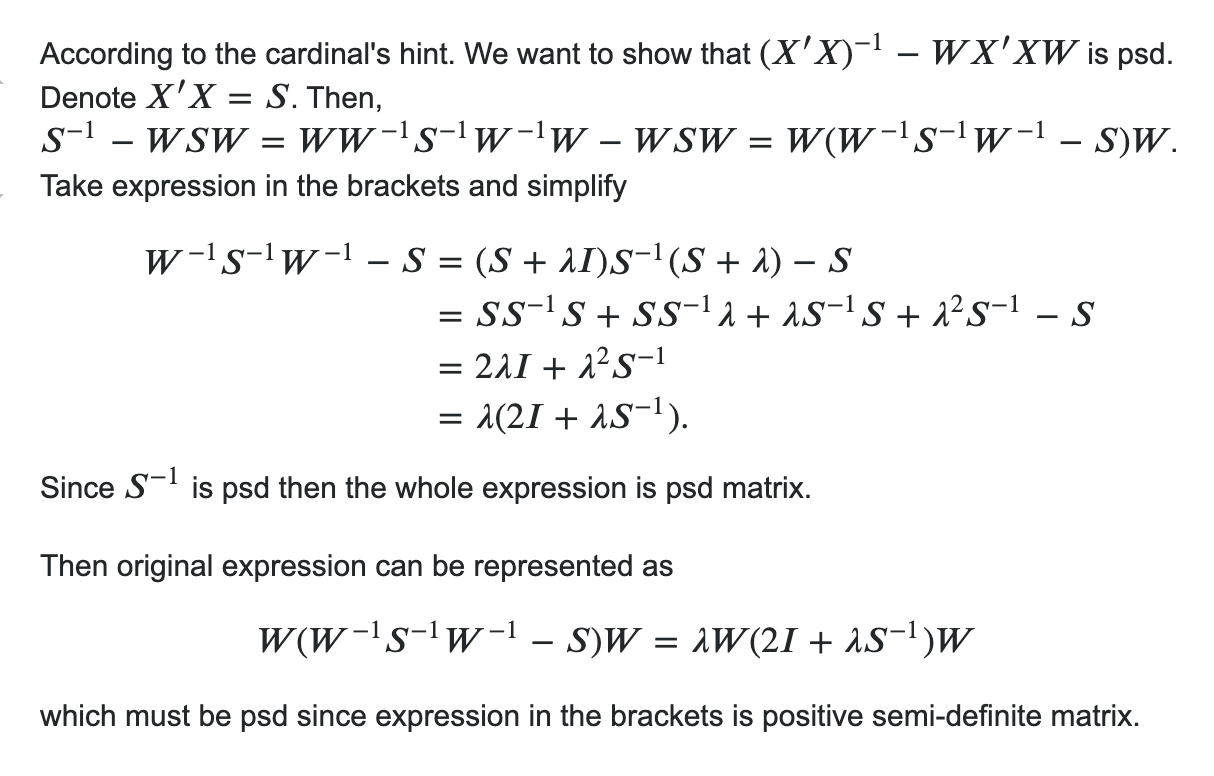

## standardization is important for Ridge regression

by convention, $X$ should be standarized, $y$ is assumed to be centered for ridge regression

for continuous predictors, standarize $X$ to have mean 0 and sd 1, 

for categorical predictors, standarize $X$ to be $\in$ {-1, +1}



### ridge is not scale-equivariant

- ordinary least square coefficients are **scale-equivariant**

    so don't need standardization but help numerical calculation for large $X$ 


- ridge coefficients are **NOT**

    because the shrinkage of $\hat \beta$ depends on magnitude of $\beta_j$ (shrinkage penalty is $\lambda \beta^T \beta$)


- **scale-equivariant**: 

    multiply a predictor $x_j$ by a constant $c$ (change input by scaling transformation),
    
    simply results in its associated $\hat \beta_j$ is multiplied by $\frac{1}{c}$ (output will be changed by the same scaling transformation)

### ridge is orthogonally invariant

$$
(X, \beta) \equiv (X\Gamma , \Gamma ^T \beta)
$$

where $\Gamma $ is a general vector param that orthogonal transform row of matrix $X$

ridge is orthogonally invariant, because $l_2$ norm of a vector is invariant for orthogonal transformation

but Lasso is **Not** orthogonally invariant

### equivariant vs. invariant   等变性 vs. 不变性

equivariant: 对于某个函数，对输入做某种变换，输出**也会有这种变换**，则该函数对这种变化具有等变性

invariant: 对于某个函数，对输入做某种变换，输出**没有变化**，则该函数对这种变化具有不变性

## dis of Ridge regression

Ridge regression is full model

for any choice of $\lambda$, $\left | \beta_j^{(\lambda)} \right |>0$,

i.e. $\left | \beta_j^{(\lambda)} \right |\rightarrow 0$ but will not be exactly 0

this is fine for prediction, but bad for interpretation because of the **large number** of coefficient

e.g., $Y=\beta_1 X_1 + ... + \beta_5 X_5 + \beta_6 X_6 +...+\beta_{1000} X_{1000} + \epsilon$

$n=100,p=1000$

Ridge regression will have **all the 1000 covariates** in the model, 

$Y=\beta_1 X_1 + ... + \beta_5 X_5 + 0.00001 X_6 +...+ 0.00001 X_{1000} + \epsilon$

while Lasso will only have those relevant 5 covariates in the model

$Y=3 X_1 + ... + 4 X_5 + 0 X_6 +...+0 X_{1000} + \epsilon$

# Lasso Regression

Lasso (**L**east **a**bsolute **s**hrinkage and **s**election **o**perator)

Lasso combines both **shrinkage and variable selection**

**different from Ridge regression**, Lasso will set some coefficient $\beta$ to be exactly 0 for large $\lambda$

which avoid overfitting to noise if sample size << number of features, 

e.g., 500 patients (sample size) vs. 30,000 genes (number of features)

and is good for interpretation: we will know which features are trully needed for prediction

- linear regression

$$
{\hat \beta}^L \in \underset{\beta}{\arg \min} \frac{1}{2n} \left \| X\beta-y \right \|_2^2+\lambda \left \| \beta \right \|_1 = \frac{1}{2n} \left \| X\beta-y \right \|_2^2+ \lambda \sum_{j=1}^p \left | \beta_j \right |
$$

same as Ridge, loss function is least square $\frac{1}{2n} \left \| X\beta-y \right \|_2^2$

regularizer is $l_1$ norm: $\left \| \beta \right \|_1= \sum_{j=1}^p \left | \beta_j \right |$

- original form of Lasso is more constrained:

$$
\beta \in \arg \min_{\beta} \frac{1}{2n} \left \| X\beta-y \right \|_2^2\\[1em]
\text{such that constraint $\left \| \beta \right \|_1 \leq R$ for some $R>0$}
$$

   

But because the convexity of the problem, 

2 forms are equivalent with respect to choices of $\lambda$ and $R$

one solver called LARS gives solution path for all choices of $\lambda$ or $R$,

it give corresponding $\beta$, then we use cross validation to find optimal $\lambda$ and $R$

## loss function: least square (RSS)

no closed form solution for ${\hat \beta}^L$

but easy for numerical optimization

methods:

1. gradient descent

2. threshold gradient descent

## credit e.g.

`rating` is the important feature to keep in the model

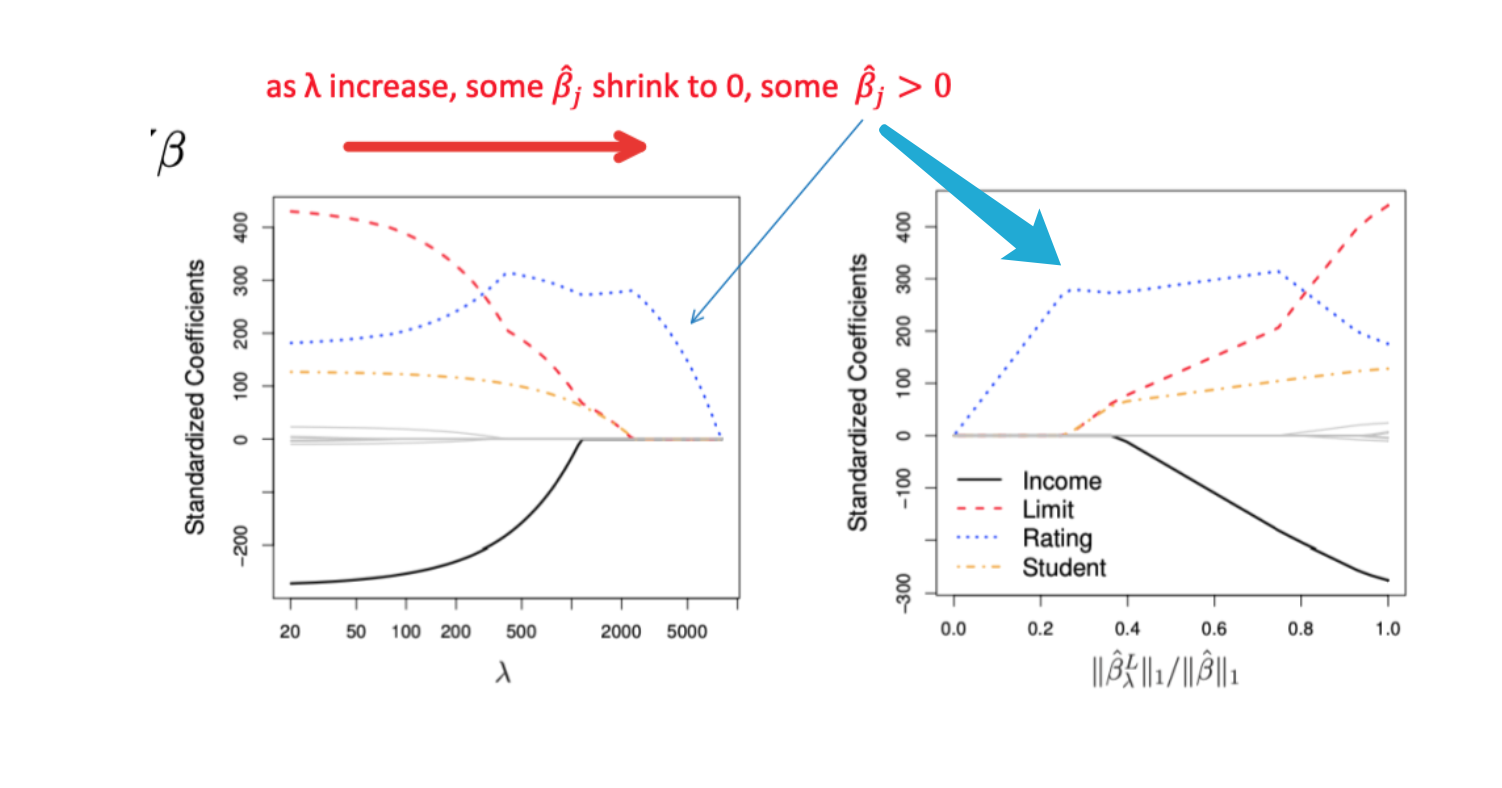

## Lasso is Not orthogonally invariant

# geometric interpretation

Ridge solutions are **dense** while Lasso solutions are **sparse**

these equivalent formulation help understand the geometry of Ridge and Lasso solutions

consider linear model $y=\beta_0 + \beta_1 x_1 + ... +\beta_p x_p + \epsilon$

the goal of Ridge and Lasso regression is to minimize RSS (residual sum of squares)

$$
\hat \beta \in  \arg \min_{\beta} RSS(\beta) =\arg \min_{\beta}  \sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2
$$

for Ridge regression: subject to constraint $\sum_{j=1}^p \beta_j^2 \leq s$ for some $s>0$

for Lasso regression: subject to constraint $\sum_{j=1}^p |\beta_j| \leq s$ for some $s>0$

in each case, there's a 1-1 mapping between $s$ and $\lambda$

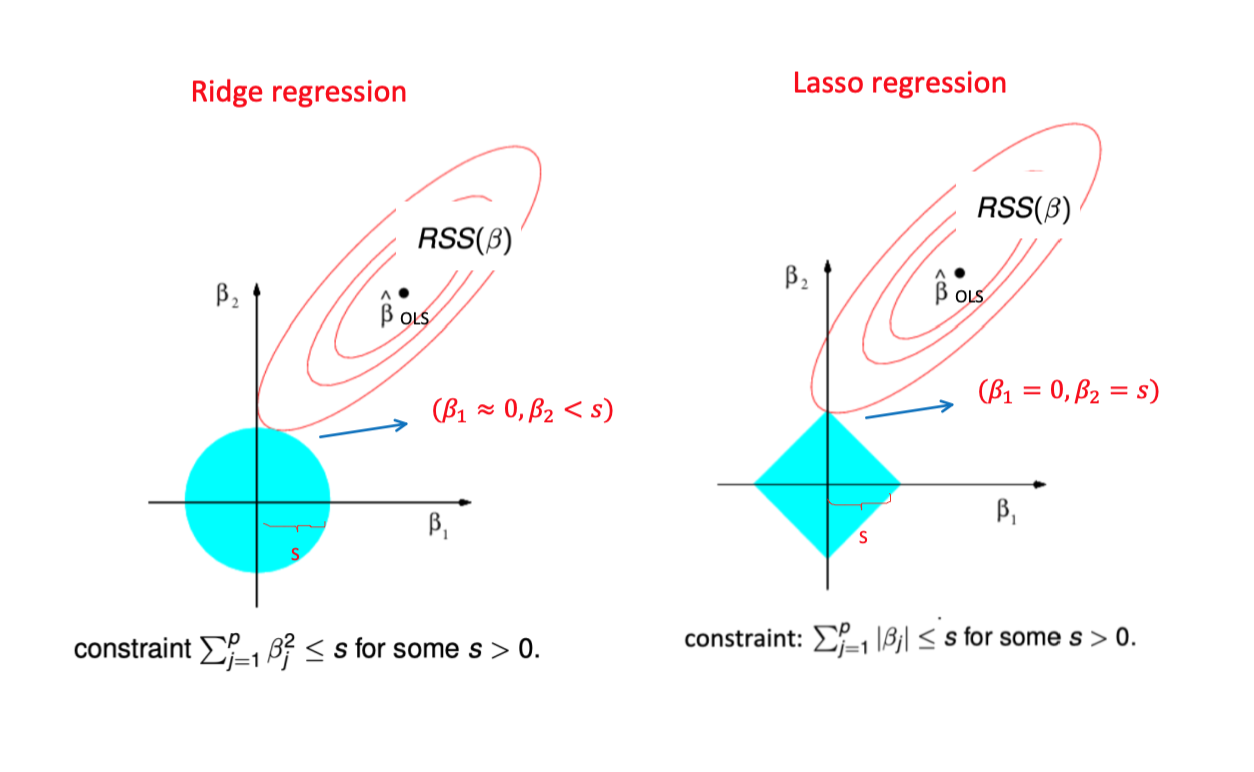

in 2-D, $\beta \in \mathbb{R}^2$

For both regression: 

   - RSS is an **ellipse**
    
   - the **center** of ellipse is **ordinary least square** solution $\hat \beta^{OLS}$ with no constraint


both expansion of ellipse or constraint will lead to a regularization estimate

the $\beta = (\beta_1, \beta_2)$ in the constraint (circle/diamond) which has the smallest ellipse is optimal solution


- For Ridge: $l_2$ norm constraint is a **circle** ($\beta_1^2 + \beta_2^2 \leq s^2$), where radius is $s$

    because it is a circle, no preference for touch points for ellipse,
    
    any points along the circumstence have equal chance of touching the ellipse,
    
    thus all $\beta_j \rightarrow 0$ 


- For Lasso: $l_1$ norm constraint is a **diamond** ($|\beta_1| + |\beta_2| \leq R$), where half of diagonal is $s$

    because a diamond is pointy 有尖角的, the first place where diamond and ellipse will touch might be apex of diamond 菱形的顶点 rather than side of diamond 菱形的边
    
    if the touch points are apexs, some $\beta_j$ is exactly 0, while some $\beta_j$ is large


# orthogonal case

orthonormal predictors means $X^TX=I_p$

where $I_p$ is $p \times p$ identity matrix

in orthogonal case, both Ridge and Lasso have **closed form solution** in terms of **OLS solution**

https://stats.stackexchange.com/questions/453212/lasso-ridge-and-best-subset-estimator-for-orthogonal-cases

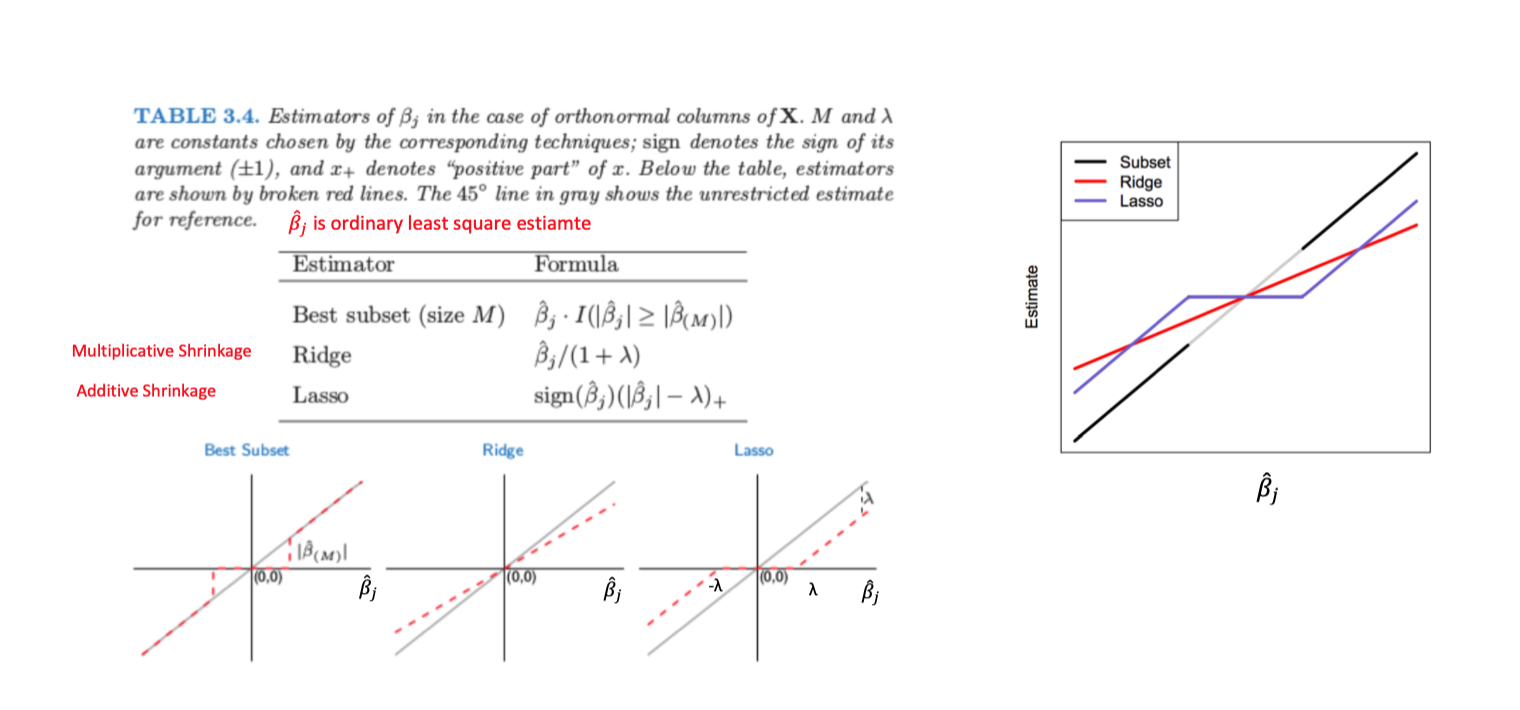

## solution

- Subset solution: threshold holding

$$
\hat \beta_j^{Subset}=\left\{\begin{matrix}
0 & \left(\left | \hat \beta_j^{OLS} \right | \leq \left | \hat \beta_{(M)} \right | \right) \\ 
\hat \beta_j^{OLS}  & \left(\left | \hat \beta_j^{OLS} \right | > \left | \hat \beta_{(M)} \right | \right)
\end{matrix}\right.
$$

where threshold is $\hat \beta_{(M)}$


- Ridge coefficients closed form solution

$$
\hat \beta_j^{Ridge}=\frac{1}{1+ \lambda}\hat \beta_j^{OLS}
$$

where $\hat \beta_j^{OLS}$ is ordinary least square solution: 

$$
\hat \beta_j^{OLS} = X_j^T y
$$


- Lasso coefficients closed form solution

$$
\hat \beta_j^{Lasso}=\left\{\begin{matrix}
\hat \beta_j^{OLS} - \lambda & \left(\hat \beta_j^{OLS}>\lambda \right)\\ 
0 & \left(\left | \hat \beta_j^{OLS} \right | \leq \lambda \right)\\ 
\hat \beta_j^{OLS} + \lambda & \left(\hat \beta_j^{OLS}< - \lambda \right)
\end{matrix}\right.
$$

## problem with Ridge and Lasso:

if true $\beta_j$ is very large, i.e. $\hat \beta_j^{OLS}$ is very large ($\hat \beta_j^{OLS} > \lambda$), 

Ridge and Lasso solution may penalize too much by $\frac{1}{1+\lambda}$ or $\lambda$

e.g., $\hat \beta_j^{OLS} = 10, \lambda = 9$, 

$\hat \beta_j^{Ridge} = \frac{1}{1+9}\times 10 = 1$, $\hat \beta_j^{Lasso} = 10 - 9 = 1$

we can use Bayisan Methods to do variable selection:

if you know $\hat \beta_j^{OLS}=10$ is large, you should be very confident with $\hat \beta_j$ as an important variable

# compare Ridge and Lasso

- Ridge and Lasso deal with **multicollinearity** differently


- if true model only has a few predictors, Lasso may be better than Ridge

  
- actual performance (mean squared error) depends on underlying truth

    use cross validation to assess performance

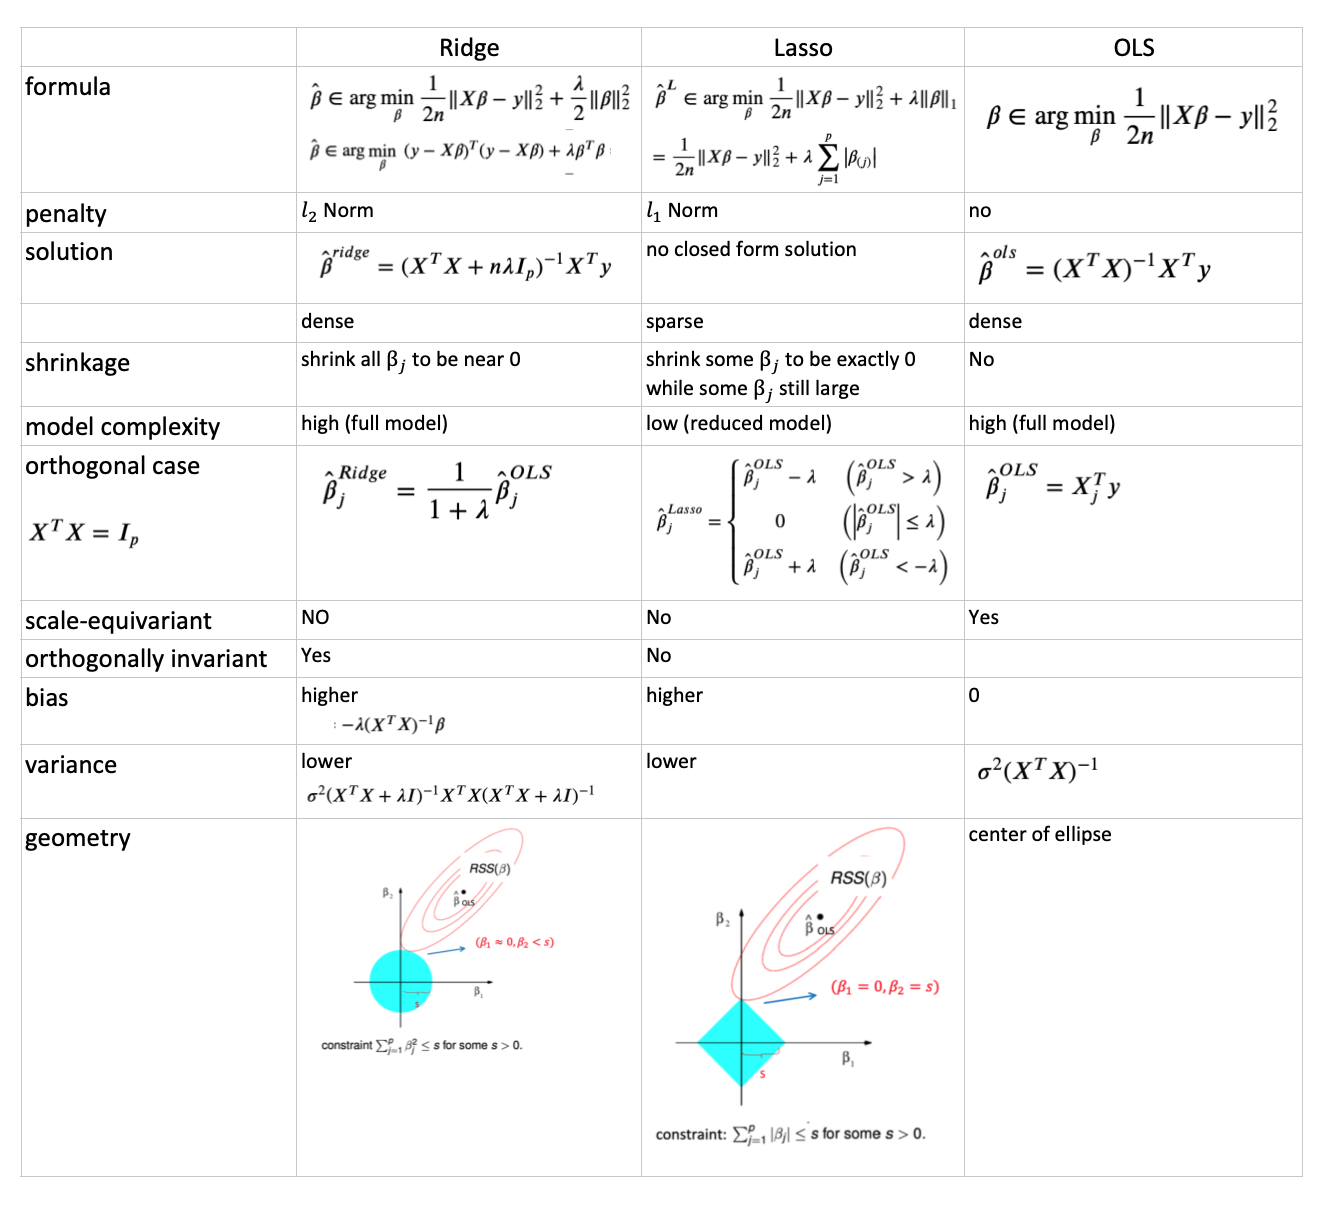

## e.g. simulated data

left: full model with 45 predictors: Ridge is slightly better

right: reduced model (sparse model) with only 2 predictors: Lasso is much better

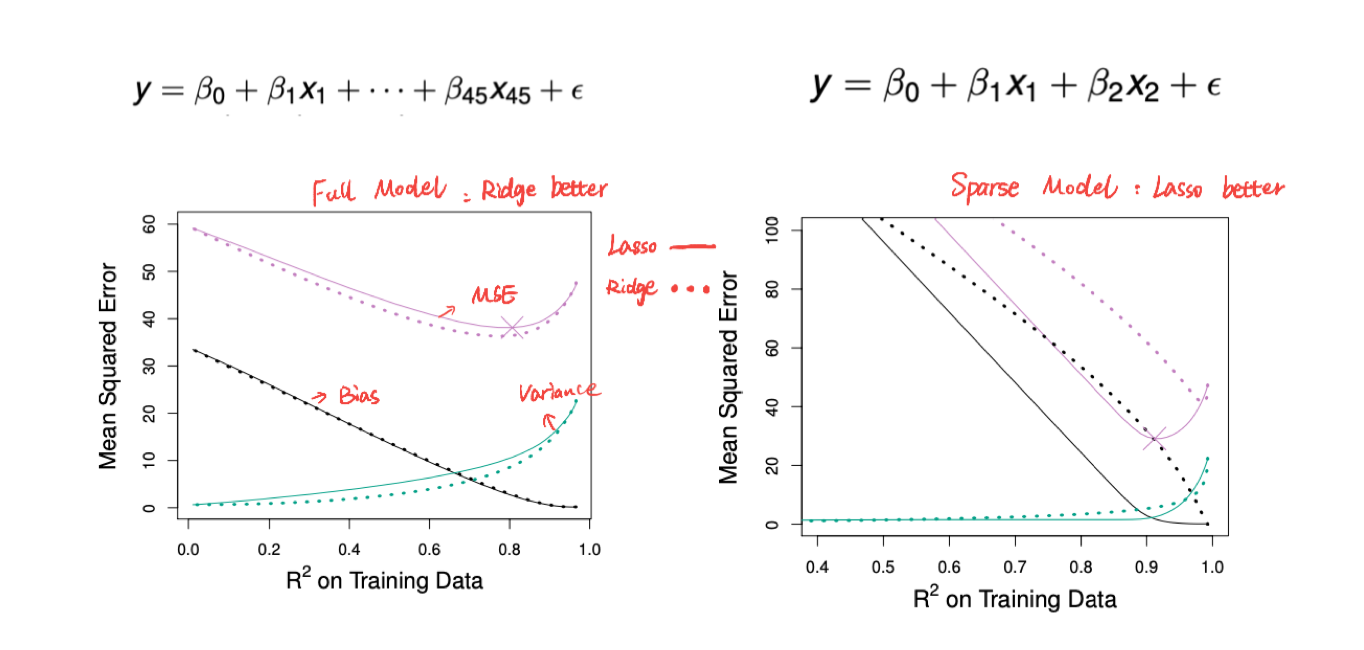

# Elastic Net

Elastic Net combines both strength of Lasso and Ridge Regression


$$
\hat \beta \in \arg \min_\beta L(\beta) + \lambda \left \| \beta \right \|_1 + \mu \left \| \beta \right \|_2^2
$$

now we have 2 hyper params: $\lambda$ and $\mu$

pick optimal $\lambda$ and $\mu$ by cross-validation by testing combination of $\lambda$ and $\mu$